### Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Import

In [2]:
dict_dfs_pre = pd.read_pickle('../data/data_pre.pkl')
dict_dfs_pre.keys()

dict_keys(['others', 'train', 'test'])

In [3]:
X_train = dict_dfs_pre['train']['X']

### Data Visualize

In [4]:
# 設定字型（已顯示中文）
plt.rcParams['font.family'] = 'Noto Sans TC'

##### 資料分布檢視

* 二元特徵

In [5]:
# 二元變數分布資料表
def count_01_features(df): 
    
    dict_01FeaCt = {}

    for col in df.columns: 
        ser_ct = df[col].value_counts()
        ct_col = ser_ct.index.name
        ct0 = ser_ct.loc[0] if 0 in ser_ct.index else 0
        ct1 = ser_ct.loc[1] if 1 in ser_ct.index else 0
        dict_01FeaCt[ct_col] = [ct0, ct1]

    df_01FeaCt = pd.DataFrame(dict_01FeaCt, index=['No', 'Yes'])
    return df_01FeaCt

df_01FeaCt = count_01_features(df=X_train.select_dtypes(include='uint8'))


In [6]:
# 圖架構
def plot_bars(data): 
    naxs = len(data.columns)    # 子圖數
    ncols = 8    # 一列 8 子圖
    nrows = (naxs // ncols) + 1 if naxs % ncols > 0 else (naxs // ncols)    # 列數
    figsize = (2*ncols, 3*nrows)    # 圖大小（子圖2x3）

    fig, axs = plt.subplots(
        ncols=ncols, nrows=nrows, figsize=figsize, 
        sharex=True, sharey=True
    )
    barx = np.array(data.index)    # x軸

    barh_max = data.values.max()
    barh_ticks = np.arange(0, barh_max+1000, 1000)

    # 畫子圖
    for i in range(nrows): 
        for j in range(ncols): 

            # return（終止巢狀迴圈）
            idx = ncols*i + j
            if idx == naxs:    
                return fig, axs
            
            # subplot
            title = data.columns[idx]    # 軸標題
            barh = data[title].values    # y軸
            axs[i, j].bar(x=barx, height=barh, width=.8)

            # axis
            axs[i, j].set_yticks(barh_ticks)
            if j == 0: 
                axs[i, j].set_ylabel('Count')

            # title
            title_s = title[:10] + '...' if len(title) > 10 else title
            axs[i, j].set_title(label=title_s)

            # text（標記少數類別）
            textx = data[title].reset_index(drop=True).idxmin()    # x座標
            texth = barh.min()    # y座標
            textr = texth/barh.sum()    # 占整體比例
            textc = 'r' if textr < .05 else 'k'    # 低於5%用紅色
            axs[i, j].text(
                x=textx, y=texth, 
                s=f'{texth:,}\n({textr: .2%})', c=textc, 
                ha='center', va='bottom'
            )


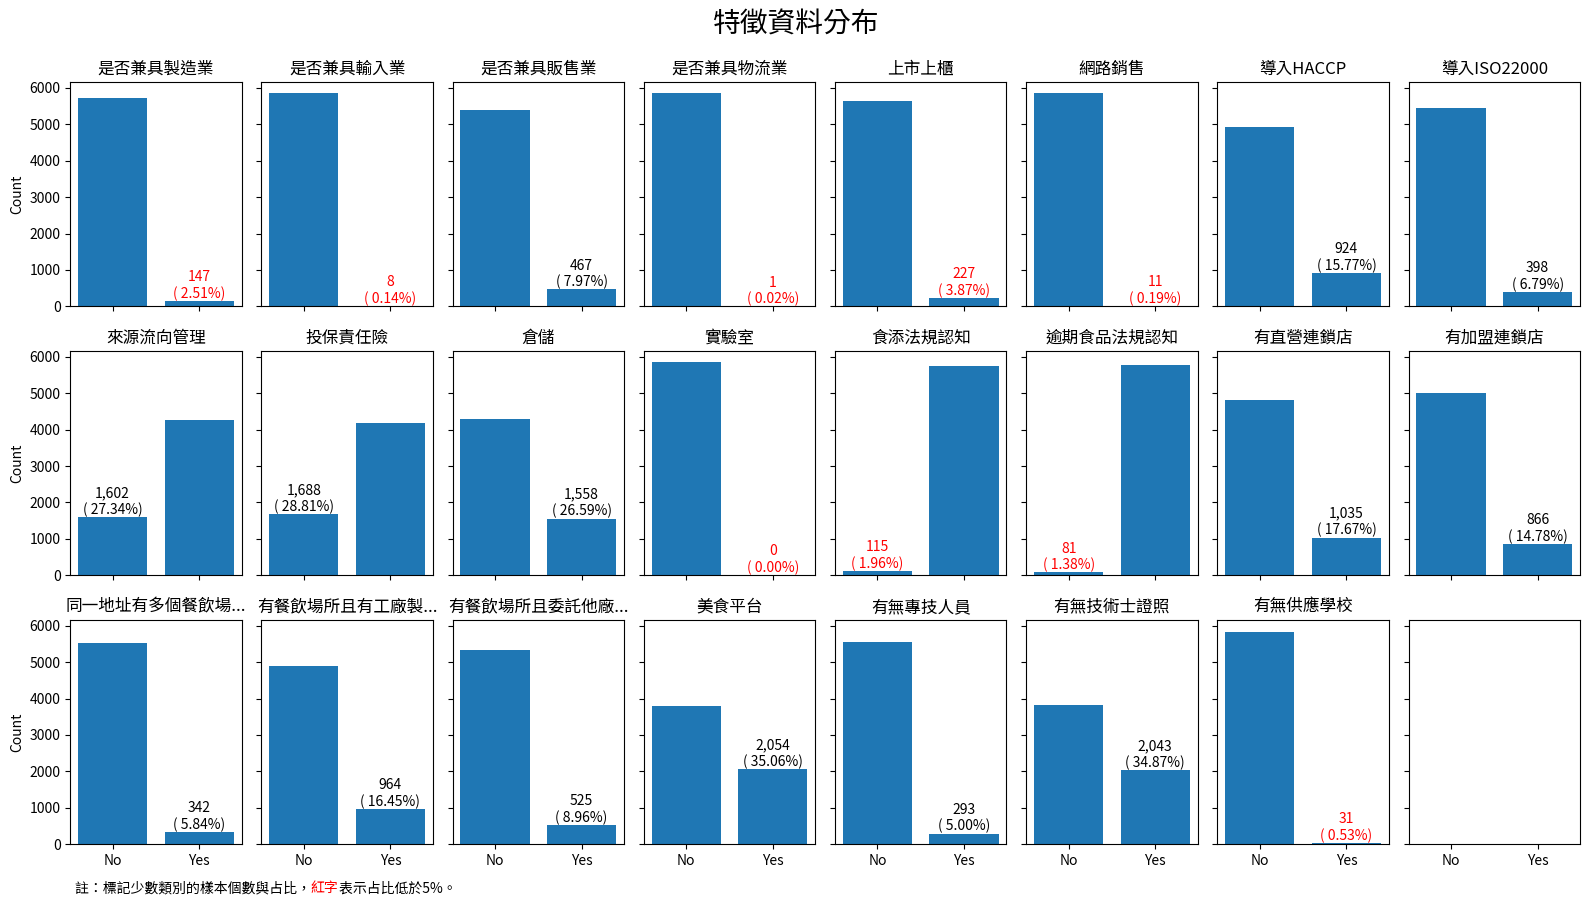

In [7]:
# 作圖
fig, axs = plot_bars(df_01FeaCt)

#   圖標題
fig.suptitle(t='特徵資料分布', fontsize=20)

#   圖註解（標記重點文字）
fig.text(x=.05, y=.0, s='註：標記少數類別的樣本個數與占比，         表示占比低於5%。')
fig.text(x=.197, y=.0, s='紅字', c='r')

fig.tight_layout(rect=[0, .01, 1, .99])    # 指定作圖範圍
plt.show()

* 類別特徵（類別數>2）

* 數值特徵

In [8]:
# # Data
# count_CatFea = X_train['營業縣市'].value_counts()
# barx = np.array(count_CatFea.index)
# bary = count_CatFea.values

# # Figure
# #   Creating a figure containing a single axes 
# fig, ax = plt.subplots(figsize=(12, 5))

# #   plot some data on the Axes
# p = ax.bar(x=barx, height=bary, width=.7)
# ax.bar_label(p, fmt='{:,.0f}')    # add bar label

# #   labels
# ax.set_xlabel('營業縣市', fontsize=16)
# ax.set_ylabel('筆數', fontsize=16)

# #   title
# ax.set_title('資料分布', fontsize=20, weight='bold')

# fig.tight_layout()

# plt.show()
